# La derivada de una función y su aproximación

**Objetivo**. Revisar el concepto de derivada usando herramientas visuales que permitan comprender su sentido geométrico y comprender lo que significa el cambio instantáneo.

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_01">MACTI-Algebra_Lineal_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME, proyectos PE101019, PE101922 y PE106025.**

In [2]:
# Importamos todas las bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sy
import macti.vis
from macti.eval import *

# Introducción

<div class="alert alert-info">

<a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>**Oxímoron**</a>. 

Es un tipo de figura literaria que consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. Por ejemplo: *el sonido del silencio*, *agridulce*, *secreto a voces*, *realidad virtual*, *más o menos*. ¿Puedes dar otros ejemplos?

</div>

Si revisamos con cuidado, algunas definiciones en matemáticas utilizan este concepto y uno de los más famosos es: **La razón de cambio instantáneo**. 

- **Cambio**, implica la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro.
- **Instantáneo** tiene que ver con algo que dura un solo instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de **cambio instantáneo** tiene que ver con un concepto muy importante en Cálculo: **la derivada**.

<div class="alert alert-success">

## Ejemplo 1. La curva del olvido.

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Un valor de $S$ cercano a $0$ corresponde a algo que no nos interesa nada y por lo tanto se nos olvida pronto.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

</div>

La siguiente celda de código define la curva del olvido en la función `R(t, S)`:

In [11]:
# Primero definimos la función del olvido
def R(t, S):
    return np.exp(-t/S)

La siguiente celda de código realiza una gráfica de la función $R(t)$ y muestra cómo decrecen nuestros recuerdos con el paso del tiempo para diferentes valores de $S$.

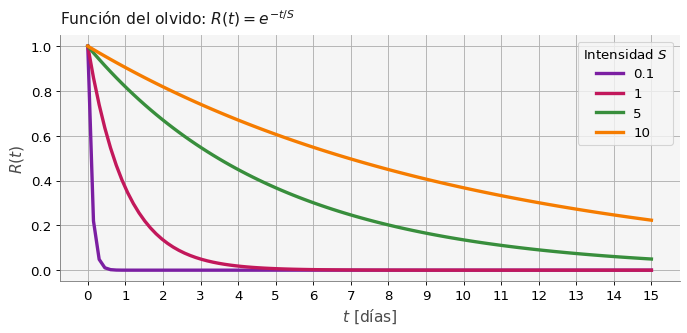

In [16]:
# Dominio de tiempo (hasta 14 días, dividido en 1000 pasos).
t = np.linspace(0, 15, 100)

# Definimos una figura para hacer la gráfica.
plt.figure(figsize=(10,4))

# Cuatro curvas del olvido para cuatro valores de S
plt.plot(t, R(t, 0.1), lw=3, c='C4', label='0.1')
plt.plot(t, R(t, 1.0), lw=3, c='C3', label='1')
plt.plot(t, R(t, 5.0), lw=3, c='C2', label='5')
plt.plot(t, R(t, 10.0), lw=3, c='C1', label='10')

# Configuración de la gráfica. 
plt.title("Función del olvido: $R(t)=e^{-t/S}$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")
plt.legend(title = 'Intensidad $S$')
plt.grid()
plt.xticks(range(0,16,1))
plt.show()

¿Será posible determinar **cada cuanto tiempo el estudiante debe repasar** las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=1.0$. ¿En qué parte de la gráfica se incrementa el olvido? en otras palabras ¿en qué parte de la gráfica el descenso es más rápido?

Para conocer ese descenso debemos calcular la [pendiente](https://es.wikipedia.org/wiki/Pendiente_(matem%C3%A1tica)) $m$. Recordando las clases de geometría, la pendiente se puede calcular con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1} \tag{1}
$$

donde $t_1$ y $t_2$ son dos tiempos distintos. 

Entonces, si definimos $t_1 = 1$ y $t_2 = 2$, la evaluación de la fórmula $(1)$, para $S=1$, da como resultado:

$$
m = \dfrac{R(2) - R(1)}{2 - 1} = \dfrac{e^{-2} - e^{-1}}{1} \approx 0.135 - 0.368 = -0.233
$$

Observa que el valor es negativo, es decir, hay un **descenso** del recuerdo de un día para otro.

Definimos ahora $h = t_2 - t_1$ y también cambiamos el nombre de $t_1$ por $t$. Con estas definiciones, la fórmula $(1)$ se transforma como sigue:

$$
m(t) = \frac{R(t + h) - R(t)}{h} \tag{2}
$$

En esta última fórmula vemos que la pendiente depende de $t$, es decir, en qué día nos encontramos y de $h$, el incremento en el tiempo.

Vamos a calcular $R(t)$ y $m(t)$ en $t = [0,1,2,3,4,5,6,7]$, para $h = 1$.

En la siguiente celda definimos algunas variables y arreglos:

In [17]:
h = 1.0
td = np.arange(0,8,h) # Definición de las t = 0,1,2,...,7
Rd = np.zeros(len(td)) # Arreglo para almacenar el valor de R en cada día
md = np.zeros(len(td)) # Arreglo para almacenar las pendientes en cada día

print('td = {}'.format(td))
print('Rd = {}'.format(Rd))
print('md = {}'.format(md))

td = [0. 1. 2. 3. 4. 5. 6. 7.]
Rd = [0. 0. 0. 0. 0. 0. 0. 0.]
md = [0. 0. 0. 0. 0. 0. 0. 0.]


Observa que el arreglo `td` contiene los días, del $0$ al $7$, y `Rd` y `md` se inicializan con $0$'s.

Ahora vamos a calcular $R$ y $m$ para los diferentes valores de $t$: 

In [18]:
# Usando un ciclo 'for', hacemos los cálculos en cada uno de los días
for i, t in enumerate(td):
    Rd[i] = R(t, 1.0)  # Evaluación de la función del olvido
    md[i] = (R(t + h, 1.0) - R(t, 1.0)) / h # Cálculo de la pendiente usando la fórmula (2)

# Ponemos la información en un DataFrame y la mostramos
tabla = pd.DataFrame(np.array([td, Rd, md]).T, 
                     columns = ['$t$', '$R(t, S=1.0)$', '$m(t)$'])
tabla

,$t$,"$R(t, S=1.0)$",$m(t)$
0,0.0,1.000000,-0.632121
1,1.0,0.367879,-0.232544
2,2.0,0.135335,-0.085548
3,3.0,0.049787,-0.031471
4,4.0,0.018316,-0.011578
5,5.0,0.006738,-0.004259
6,6.0,0.002479,-0.001567
7,7.0,0.000912,-0.000576


Observa que:

* el valor de la **pendiente**  $m$  es **negativa**, lo cual indica un decrecimiento,
* también la magnitud de la pendiente (su valor absoluto) disminuye conforme $t$  avanza,
* y que el recuerdo disminuye mucho al principio.

Esto se ve de manera gráfica como sigue:

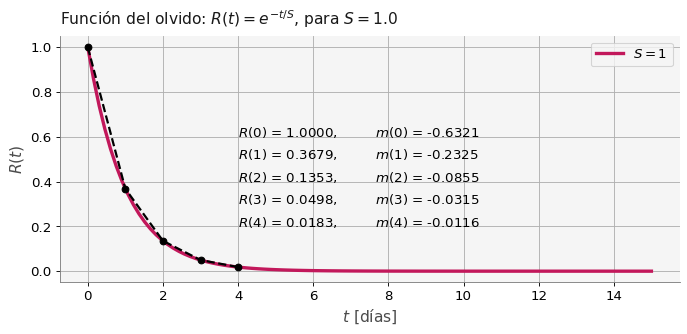

In [30]:
# Dominio de tiempo (hasta 14 días, dividido en 1000 pasos).
t = np.linspace(0,15,100)

plt.figure(figsize=(10,4))

# La curva del olvido para S = 1.0
plt.plot(t, R(t, 1.0), lw=3, c='C3', label='$S = 1$')

# Información de los primeros 4 días (línea punteada)
plt.plot([0,1,2,3,4], [Rd[0], Rd[1], Rd[2], Rd[3], Rd[4]], 'o--k', lw=2, zorder=5)

# Texto y datos de R y m
plt.text(4,0.6,f'$R$({0}) = {Rd[0]:5.4f},\t $m$({0:}) = {md[0]:5.4f}')
plt.text(4,0.5,f'$R$({1}) = {Rd[1]:5.4f},\t $m$({1:}) = {md[1]:5.4f}')
plt.text(4,0.4,f'$R$({2}) = {Rd[2]:5.4f},\t $m$({2:}) = {md[2]:5.4f}')
plt.text(4,0.3,f'$R$({3}) = {Rd[3]:5.4f},\t $m$({3:}) = {md[3]:5.4f}')
plt.text(4,0.2,f'$R$({4}) = {Rd[4]:5.4f},\t $m$({4:}) = {md[4]:5.4f}')

# Configuración de la gráfica. 
plt.title("Función del olvido: $R(t)=e^{-t/S}$, para $S = 1.0$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")
plt.grid()
plt.legend()
plt.show()

Observa que:

* En la figura anterior, la línea punteada une los puntos para cada uno de los días; esta línea punteada muestra gráficamente el cambio en $R(t)$ de un día a otro. 

* Entonces, lo que estamos observando es la razón de cambio de $R(t)$ en intervalos de tiempo de longitud $h = 1$ día. **Esto es justamente lo que expresa la fórmula $(2)$**. 

* Los valores de $R$ para los diferentes días indican como es que vamos olvidando lo que estudiamos en el día 0:
    - Para el día 1 ya solo recordamos el $36.79\%$,
    - en el segundo día el recuerdo es del $13.53\%$,
    - en el día 3 el recuerdo es del $4.98\%$ y
    - al día 4 ta prácticamente olvidamos todo con un recuerdo del $1.8\%$!.

* Por lo tanto, para este caso de $S=1.0$, es conveniente repasar todos los días lo que se aprendió en el primer día.

Como vimos en el ejemplo anterior, el cálculo de la pendiente se realizó para $h = 1$ día. ¿Que pasará para $h=0.5$? es decir ¿cuánto hemos olvidado en medio día? e incluso, ¿cuánto hemos olvidado en una hora, un minuto, ...? Para responder a estas preguntas, necesitamos realizar el cálculo para cuando $h$ se hace cada vez más pequeña, incluso para $h \to 0$. Obviamente no se puede hacer $h=0$ porque la fórmula de $m(t)$ no estaría bien definida (¡división por cero!). Pero si podemos escribirla en términos de un [límite](https://es.wikipedia.org/wiki/L%C3%ADmite_(matem%C3%A1tica)) (recuerdas tus clases de cálculo) como sigue:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h} \tag{3} = ¿?
$$

A este límite lo llamamos **la razón de cambio instantáneo** (el oxímoron finalmente).

¿Cúanto vale este límite? ¿Es posible calcularlo en cualquier caso y para cualquier tipo de función?

<div class="alert alert-success">

## Ejemplo 2. ¿Qué pasa cuando $h \to 0$ para diferentes valores de $S$?.
    
Ejecuta la siguiente celda de código para generar el interactivo en donde podrás modificar $S$, $h$ y $t$. Explora qué sucede para cada valor de los parámetros.

Para ver los valores de $R(t)$, $R^\prime(t)$ y $m(t)$ haz clic sobre el botón `Muestra valores` sobre el interactivo

</div>


In [56]:
%run "./zinteractivo1.ipynb"

interactive(children=(FloatSlider(value=0.5, description='S', max=5.0, min=0.5, step=0.5), FloatSlider(value=1…

<function __main__.razonDeCambio(S, h, i0, anot)>

**Comentarios.**

* Gráfica de la izquierda:
    - La línea verde es la razón de cambio instantánea en el punto rojo.
    - La línea roja representa una aproximación a la razón de cambio instantánea en el punto rojo.
    - Conforme $h$ se hace más pequeña, la línea roja se aproxima cada vez más a la línea tangente (verde). 

* Gráfica de la derecha:
    - Observamos la curva de la derivada $R^\prime(t)$ (verde).
    - Un punto púrpura que representa el valor exacto de $R^\prime(t)$.
    - Un punto negro que es la aproximación de la derivada $m(t)$ para una $h$ dada.

Entonces, la tangente en el punto rojo, no es otra cosa que **la razón de cambio instantánea**. Ambas cosas representan un concepto conocido como **la derivada de la función** en el punto rojo.

<a name='3'></a>
## Definición de derivada

La fórmula $(3)$ es la definición formal de la derivada de una función. En casi todos los libros de cálculo encontrarás la siguiente notación para la derivada de la función $f(x)$:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \tag{5}
$$

La derivada existe siempre y cuando exista este límite. ¿Puedes imaginar cuando este límite no existe? 

Observa que en la definición anterior se está calculando la pendiente de la función $f(x)$ en $x$. ¿Cuándo es que esta pendiente no se puede calcular?

<div class="alert alert-success">

## Ejemplo 3. Aproximación de la derivada hacia adelante y hacia atrás.

Ejecuta la siguiente celda de código. Obtendrás un interactivo en donde podrás modificar $h$ y $x$.<br>
* Explora los valores de $f^\prime$, $m$ y del Error Absoluto cuando modificas $x$ y $h$.
* Observa lo que sucede cuando activas el botón `Hacia atrás`.
* ¿El error absoluto es menor o mayor con el botón `Hacia atrás` activado? ¿De qué depende?

</div>

In [54]:
%run "./zinteractivo2.ipynb"

interactive(children=(FloatSlider(value=1.0, description='h', max=2.0, min=0.1), FloatSlider(value=6.0, descri…

<function __main__.derivada(h, x0, back)>


Observamos en el interactivo anterior que también es posible calcular la derivada "hacia atrás" lo cual significa usar un punto a la izquierda del lugar donde se desea obtener la derivada (punto rojo). Esto se puede escribir analíticamente de la siguiente manera:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x) - f(x-h)}{h} \tag{6}
$$

Entonces, las ecuaciones $(5)$ y $(6)$ indican dos maneras de calcular la derivada en un punto, pero que deben coincidir cuando $h \to 0$.

Se puede pensar en el límite por la derecha, ecuación $(5)$ y el límite por la izquierda, ecuación $(6)$. Ambos deben existir y deben ser iguales para que la derivada en un punto exista.

¿Te puedes imaginar cómo se calcula el **error absoluto** mostrado en la gráfica? ¿Será posible calcular un error **error relativo**?

<a name='2-1'></a>
## ¿Cómo calcular la derivada analíticamente?

Consideremos la función $f(x) = x^3$ y apliquemos la definición de derivada:

$$
\frac{d f}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} = \lim_{h \to 0} \frac{(x + h)^3 - x^3}{h}
$$

Si expandimos los términos del numerador obtenemos:

$$
\frac{d f}{dx} = \lim_{h \to 0} \, (3x^2 + 3 x h + h ^2) \tag{7}
$$

La función $3x^2 + 3 x h + h ^2$ es una aproximación a la derivada exacta.

Al calcular el límite obtenemos la derivada exacta:

$$
\frac{d f}{dx} = 3x^2 \tag{8}
$$

¿Cómo podrías calcular el error entre la derivada exacta $(8)$ y la aproximada $(7)$?

¿Podrías calcular la derivada analíticamente usando la definición de la ecuación $(6)$?